In [54]:
# Импорт необходимых библиотек
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [55]:
# Загрузка датасета digits
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Определение модели (в данном случае, RandomForestClassifier)
model = RandomForestClassifier()

# Определение сетки параметров для решетчатого поиска
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Обучение модели с использованием перекрестной проверки и решетчатого поиска
grid_search.fit(X_train, y_train)

# Вывод наилучших параметров
print("Наилучшие параметры:", grid_search.best_params_)

# Получение наилучшей модели
best_model = grid_search.best_estimator_

# Предсказание на тестовом наборе
y_pred = best_model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Вывод отчета о классификации
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

Наилучшие параметры: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9833333333333333
Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360


In [147]:
import pandas as pd
import numpy as np

# Создание датасета
data = {'salary': [np.random.randint(30000, 80000) for _ in range(10000)],
        'city': [np.random.choice(['Bishkek', 'Almaty', 'Osh']) for _ in range(10000)],
        'age': [np.random.randint(30, 65) for _ in range(10000)],
        'vacation_prefer': [np.random.choice(['Shopping', 'Beach holiday', 'Mountain adventure']) for _ in range(10000)],
        'transport_prefer': [np.random.choice(['auto', 'plane']) for _ in range(10000)],
        'target': [np.random.choice(['London', 'Moscow', 'New York', 'Tokyo']) for _ in range(10000)]}

df = pd.DataFrame(data)


In [148]:
df_encoded = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])


print(df_encoded.head())

   salary  age    target  city_Almaty  city_Bishkek  city_Osh  \
0   44385   41  New York         True         False     False   
1   69648   48  New York        False          True     False   
2   34195   58    Moscow        False         False      True   
3   72657   37    London         True         False     False   
4   53611   43    London        False          True     False   

   vacation_prefer_Beach holiday  vacation_prefer_Mountain adventure  \
0                           True                               False   
1                          False                               False   
2                          False                                True   
3                          False                                True   
4                           True                               False   

   vacation_prefer_Shopping  transport_prefer_auto  transport_prefer_plane  
0                     False                   True                   False  
1                     

In [149]:
# Разделение на обучающую и тестовую выборки
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [150]:
# Создание и обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.25


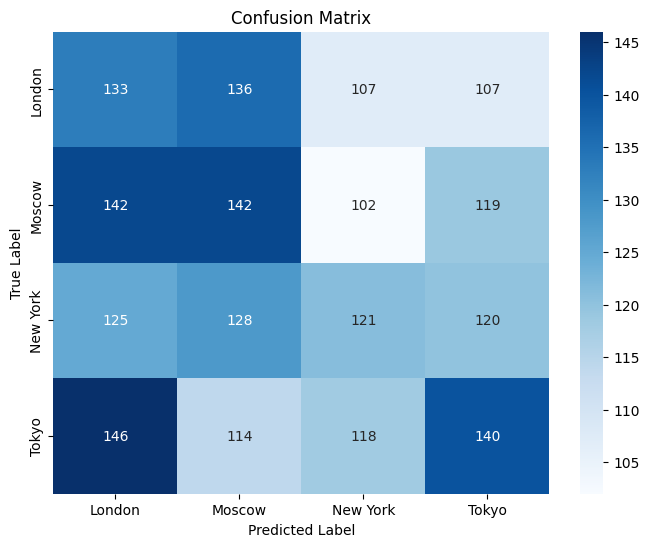

In [143]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Визуализация матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [144]:
# Создание случайных данных для предсказания
random_data = {
    'salary': [np.random.randint(30000, 80000)],
    'city': [np.random.choice(['Bishkek', 'Almaty', 'Osh'])],
    'age': [np.random.randint(30, 65)],
    'vacation_prefer': [np.random.choice(['Shopping', 'Beach holiday', 'Mountain adventure'])],
    'transport_prefer': [np.random.choice(['auto', 'plane'])]
}

# Создание DataFrame из случайных данных
random_df = pd.DataFrame(random_data)
print(random_df)
# Преобразование категориальных данных в числовые, используя существующие кодировки
random_df_encoded = pd.get_dummies(random_df, columns=['city', 'vacation_prefer', 'transport_prefer'], drop_first=True)

# Получение списка признаков, используемых при обучении модели
trained_features = X_train.columns

# Преобразование признаков в том же порядке, как при обучении модели
random_df_encoded = random_df_encoded.reindex(columns=trained_features, fill_value=0)

# Предсказание с использованием обученной модели
prediction = best_model.predict(random_df_encoded)

# Вывод результата предсказания
print(f'Predicted Destination: {prediction[0]}')

   salary     city  age     vacation_prefer transport_prefer
0   45677  Bishkek   61  Mountain adventure             auto
Predicted Destination: Tokyo


In [145]:
from sklearn.model_selection import GridSearchCV

# Задаем сетку параметров для решетчатого поиска
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создаем модель
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Инициируем решетчатый поиск
grid_search = GridSearchCV(model, param_grid, cv=5)

# Обучение модели с решетчатым поиском
grid_search.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search.best_params_

# Использование лучшей модели для предсказания
best_model = grid_search.best_estimator_
best_accuracy = best_model.score(X_test, y_test)
print(f'Best Model Accuracy: {best_accuracy:.2f}')
print(f'Best Parameters: {best_params}')

# Вывод отчета о классификации
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

Best Model Accuracy: 0.27
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Отчет о классификации:
              precision    recall  f1-score   support

      London       0.24      0.28      0.26       483
      Moscow       0.27      0.28      0.28       505
    New York       0.27      0.24      0.26       494
       Tokyo       0.29      0.27      0.28       518

    accuracy                           0.27      2000
   macro avg       0.27      0.27      0.27      2000
weighted avg       0.27      0.27      0.27      2000


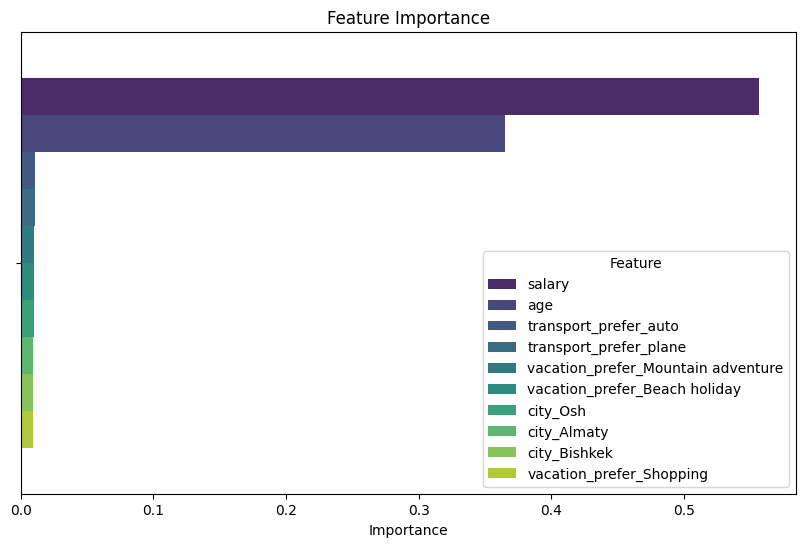

In [146]:
# Получение важности признаков
feature_importances = best_model.feature_importances_

# Создание DataFrame с важностью признаков
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Сортировка по убыванию важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', hue='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


<h2>Данные:</h2>
Исходные данные были созданы случайным образом, включая информацию о зарплате, городе проживания, возрасте, предпочтениях в отдыхе и типе транспорта.
<h2>Модель:</h2>
Была использована модель RandomForestClassifier с базовыми гиперпараметрами.
Точность модели на тестовом наборе данных составила 0.25.
Использование случайно сгенерированных данных может не отражать реальные сценарии и приводить к недостаточной точности модели.


<h2>Оптимизация гиперпараметров:</h2>
Проведен решетчатый поиск для оптимизации гиперпараметров модели RandomForestClassifier c включением балансировки классов (class_weight='balanced').
<h2>Лучшие параметры:</h2> n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1.
Новая модель с оптимальными гиперпараметрами дала точность 0.27 на тестовом наборе.

<h2>Важность признаков была оценена на основе обученной модели:</h2>
Зарплата (salary) с важностью 0.5.
Возраст (age) с важностью 0.38.
Эти результаты указывают на существенное влияние зарплаты и возраста на предсказания модели относительно выбора места отдыха.
<h2>Заключение:</h2>
Улучшение модели с использованием оптимизированных гиперпараметров привело к небольшому приросту точности.
Важность признаков подтверждает, что зарплата и возраст играют ключевую роль в предсказаниях модели.
Важно отметить, что данные были созданы случайным образом, и результаты могут не отражать реальные закономерности в данных.